In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [68]:
# Load dataset
file = "/content/Visualization Dataset.xlsx"
df = pd.read_excel(file, sheet_name="Sheet1")

In [69]:
# Data Cleaning
df_cleaned = df.iloc[3:].reset_index(drop=True)
df_cleaned.columns = [
    "Index", "Transportation Services", "Fiscal Year", "Revenues",
    "Expenditures", "Net Revenue", "YoY Variance $", "YoY Variance %", "Customer Satisfaction"]

df_cleaned = df_cleaned.drop(columns=["Index"]).dropna(subset=["Transportation Services"]).reset_index(drop=True)
df_cleaned = df_cleaned.iloc[1:].reset_index(drop=True)

In [70]:
 #Convert numerical columns to appropriate data types
numeric_columns = ["Revenues", "Expenditures", "Net Revenue", "YoY Variance $", "YoY Variance %", "Customer Satisfaction"]
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")

# Filter out non-data rows
df_viz = df_cleaned.dropna(subset=["Revenues", "Expenditures", "Net Revenue", "Customer Satisfaction"])

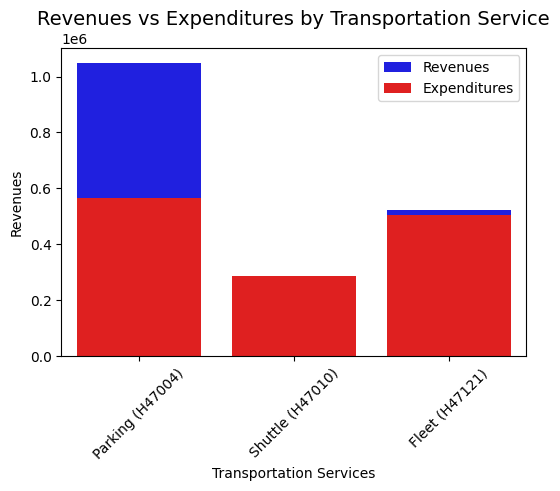

In [71]:
### Plot 1: Bar plot for Revenues and Expenditures ###
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df_viz, x="Transportation Services", y="Revenues", color="blue", label="Revenues"
)
sns.barplot(
    data=df_viz, x="Transportation Services", y="Expenditures", color="red", label="Expenditures"
)
plt.title("Revenues vs Expenditures by Transportation Service", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.show()

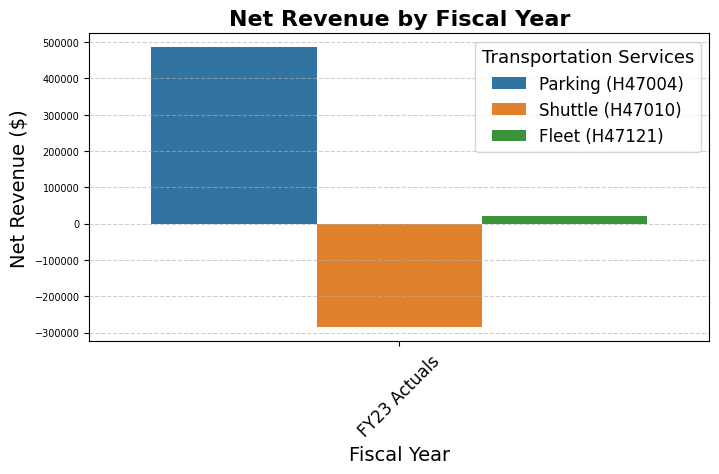

In [72]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_viz, x="Fiscal Year", y="Net Revenue", hue="Transportation Services",
    palette="tab10"
)
plt.title("Net Revenue by Fiscal Year", fontsize=16, fontweight='bold')
plt.xlabel("Fiscal Year", fontsize=14)
plt.ylabel("Net Revenue ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=7)
plt.legend(title="Transportation Services", fontsize=12, title_fontsize=13)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [74]:
!pip install dash


In [75]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)
df_viz = pd.DataFrame({
    "Date": pd.date_range(start="2024-01-01", periods=10, freq='D'),
    "Net Revenue": np.random.randint(-300000, 500000, 10),
    "Expenditures": np.random.randint(100000, 400000, 10),
    "Customer Satisfaction": np.random.uniform(7.0, 9.0, 10),
    "Department": np.random.choice(["Parking", "Shuttle", "Fleet"], 10)
})

# Ensure Date is datetime format
df_viz["Date"] = pd.to_datetime(df_viz["Date"])

# Net Revenue Comparison Across Departments
fig_bar = px.bar(
    df_viz, x="Department", y="Net Revenue", color="Department",
    title="Net Revenue Comparison Across Departments"
)

# Revenue and Expenditures by Department
fig_grouped_bar = px.bar(
    df_viz, x="Department", y=["Net Revenue", "Expenditures"], barmode='group',
    title="Revenue and Expenditures by Department"
)

# Line Chart: Year-over-Year Revenue Growth Trend
fig_line = px.line(
    df_viz, x="Date", y="Net Revenue", color="Department",
    markers=True, title="Revenue Growth Trend Over Time"
)

# Scatter Plot: Customer Satisfaction vs Net Revenue
fig_scatter = px.scatter(
    df_viz, x="Customer Satisfaction", y="Net Revenue",
    color="Department", size=df_viz["Net Revenue"].abs(),
    title="Customer Satisfaction vs Net Revenue"
)

# Dash App
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Business Insights Dashboard", style={'textAlign': 'center'}),
    dcc.Graph(figure=fig_bar),
    dcc.Graph(figure=fig_grouped_bar),
    dcc.Graph(figure=fig_line),
    dcc.Graph(figure=fig_scatter)
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>